In [66]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
fs = 15
legend_fs = 11

folder = 'prova/'

In [67]:
c2ddata = pd.read_csv(folder + 'cart-data2d.csv')
c3ddata = pd.read_csv(folder + 'cart-data3d.csv')

#c2ddata.head(3)
c2ddata['V_rel_block'] = c2ddata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)
c3ddata['V_rel_blockx'] = c3ddata.apply(lambda row: row.V_block_finx - row.Wind_x, axis=1)

time = c3ddata['TotTime'].max()

c2ddata.head(4)

,Iter,TotTime,m_block,Alpha,Theta0,Theta_fin,V_theta_fin,V_block_fin,Wind_x,Wind_y,...,F_vinc,Tension,Lift,Liftx,Liftz,Drag,Dragx,Dragz,Stability,V_rel_block
0,41984,4.20,100.0,-8.0,0.79,0.0,0.0,0.0,1.0,0.0,...,981.00,136.21,-130.52,130.29,-7.74,4.35,0.26,4.34,0,-1.0
1,46089,4.61,100.0,-8.0,0.79,0.0,0.0,0.0,3.0,0.0,...,981.00,424.44,-407.88,405.82,-40.97,13.60,1.37,13.53,0,-3.0
2,32836,3.28,100.0,-8.0,0.79,0.0,0.0,0.0,5.0,0.0,...,980.93,948.33,-915.85,911.40,-90.16,30.53,3.01,30.38,0,-5.0
3,24168,2.42,100.0,-8.0,0.79,0.0,0.0,0.0,7.0,0.0,...,980.93,1638.56,-1584.63,1577.70,-148.08,52.82,4.94,52.59,0,-7.0


In [68]:
c2ddata.Alpha.unique()

array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.,
       18., 19., 20.])

## 1) Block velocities as a function of the attack angle for various wind velocities

In [69]:
wmin = 11
wmax = 41
step = 2

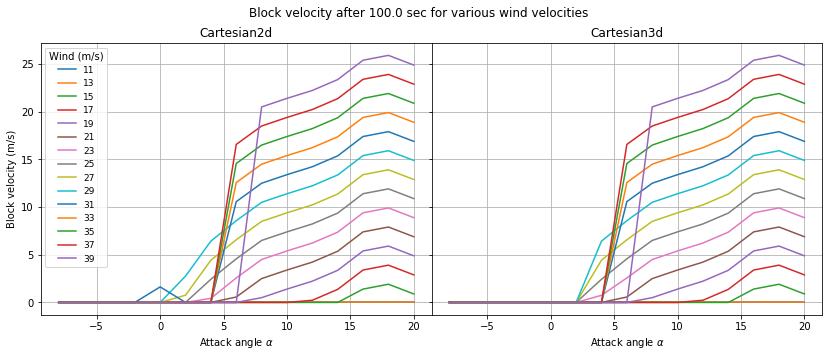

In [70]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    #print(float(w))
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")
    
    wdf = c2ddata.loc[c2ddata['Wind_x'] == float(w)]
    #print(wdf.head(5))
    axs[0].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.grid(b=True)
    
    wdf = c3ddata.loc[c3ddata['Wind_x'] == float(w)]
    wdf.head(2)
    axs[1].plot(wdf['Alpha'], wdf['V_block_finx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel('Block velocity (m/s)')
    #axs[0].set_xlim(0,20)
    
    axs[0].set_title("Cartesian2d")
    axs[1].set_title("Cartesian3d")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
plt.savefig('Images/vblock_alpha_pi4_2d3d.png')

## 2) Kite relative velocity as a function of wind velocities for various alpha

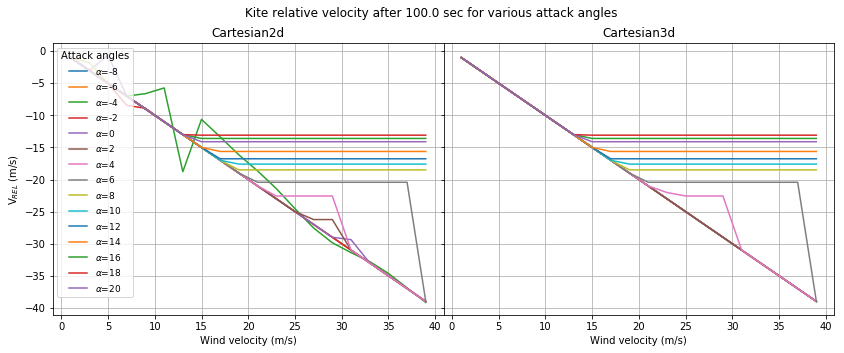

In [71]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various attack angles")
    
    wdfc = c2ddata.loc[c2ddata['Alpha'] == angle]
    axs[0].plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
    plt.grid(b=True)
    
    wdfs = c3ddata.loc[c3ddata['Alpha'] == angle]
    axs[1].plot(wdfs['Wind_x'], wdfs['Vrelx'], label=r'$\alpha$='+str(angle))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Attack angles', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian2d")
    axs[1].set_title("Cartesian3d")
    
for ax in axs.flat:
    ax.set(xlabel='Wind velocity (m/s)')
    
plt.savefig('Images/vrel_wind_pi4_2d3d.png')

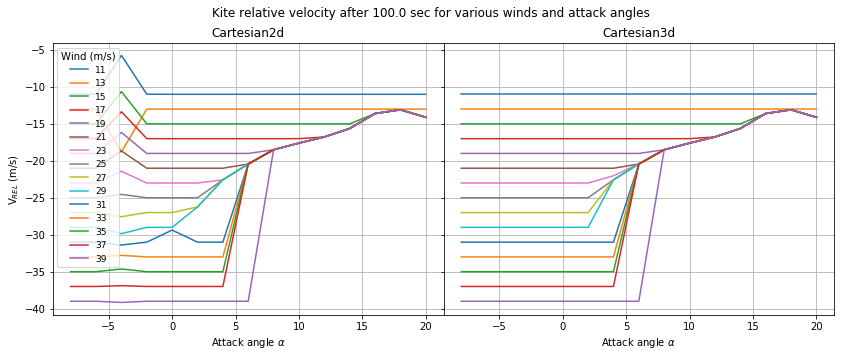

In [72]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various winds and attack angles")
    
    wdfc = c2ddata.loc[c2ddata['Wind_x'] == float(w)]
    axs[0].plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    plt.grid(b=True)
    
    wdfs = c3ddata.loc[c3ddata['Wind_x'] == float(w)]
    axs[1].plot(wdfs['Alpha'], wdfs['Vrelx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian2d")
    axs[1].set_title("Cartesian3d")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
plt.savefig('Images/vrel_alpha_pi4_2d3d.png')